# **450 Bird Species Multi Class Image Classification using Deep Learning in PyTorch**
![](https://user-images.githubusercontent.com/22872200/45708132-49ab7380-bb9e-11e8-8bd5-8beb9f077d90.jpg)

# **About the Dataset**

Data set of 450 bird species. 70,626 training images, 22500 test images(5 images per species) and 2250 validation images(5 images per species. This is a very high quality dataset where there is only one bird in each image and the bird typically takes up at least 50% of the pixels in the image. As a result even a moderately complex model will achieve training and test accuracies in the mid 90% range.
All images are 224 X 224 X 3 color images in jpg format. Data set includes a train set, test set and validation set. Each set contains 450 sub directories, one for each bird species.

# ***Objective***
To train a deep learning model in successfully recognizing various kinds of birds state-of-the-art techniques like using different CNNs (Convolutional Neural Network), Data Augmentation, Regularization, ResNet,etc and achieve a satisfactory accuracy.


In [1]:
!pip install jovian --upgrade --quiet
!pip install opendatasets --quiet

     |████████████████████████████████| 68 kB 6.5 MB/s 


In [2]:
import opendatasets as od

### Importing the Necessary libraries

In [3]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
project_name='Birds-Classification-A-Deep-Learning-Project'

### **Preparing the Dataset**

In [5]:
dataset_url='https://www.kaggle.com/datasets/gpiosenka/100-bird-species/download'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rimoghosh
Your Kaggle Key: ··········


100%|██████████| 1.69G/1.69G [01:31<00:00, 19.8MB/s]


In [6]:
os.listdir('.')

['.config', '100-bird-species', 'sample_data']

In [7]:
data_dir='./100-bird-species'
print(os.listdir(data_dir))
classes=os.listdir(data_dir+'/train')
print(len(classes))
print(classes)

['BIRDS-450-(200 X 200)-99.28.h5', 'birds.csv', 'images to test', 'test', 'train', 'info.txt', 'valid']
450
['CHARA DE COLLAR', 'WILSONS BIRD OF PARADISE', 'DOWNY WOODPECKER', 'CRESTED COUA', 'ALTAMIRA YELLOWTHROAT', 'ASIAN DOLLARD BIRD', 'ANNAS HUMMINGBIRD', 'HOUSE SPARROW', 'CAPE LONGCLAW', 'CINNAMON FLYCATCHER', 'TAILORBIRD', 'CHINESE POND HERON', 'BLACK-CAPPED CHICKADEE', 'WATTLED CURASSOW', 'CASPIAN TERN', 'RAZORBILL', 'NORTHERN FLICKER', 'DAURIAN REDSTART', 'DARJEELING WOODPECKER', 'SHORT BILLED DOWITCHER', 'BLUE GROUSE', 'CRESTED FIREBACK', 'SRI LANKA BLUE MAGPIE', 'BANDED PITA', 'SCARLET CROWNED FRUIT DOVE', 'NORTHERN RED BISHOP', 'BLUE HERON', 'ANDEAN GOOSE', 'GOLDEN PHEASANT', 'GO AWAY BIRD', 'GOLDEN CHEEKED WARBLER', 'KIWI', 'EASTERN WIP POOR WILL', 'HAMERKOP', 'LESSER ADJUTANT', 'MALACHITE KINGFISHER', 'DOUBLE BARRED FINCH', 'PHILIPPINE EAGLE', 'GRAY PARTRIDGE', 'COMMON IORA', 'KOOKABURRA', 'COMMON LOON', 'NORTHERN FULMAR', 'CRIMSON SUNBIRD', 'GOLDEN CHLOROPHONIA', 'TASMANI

In [8]:
ivory_gull=os.listdir(data_dir+'/train/IVORY GULL')
print("Number of training examples for Ivory Gull:",len(ivory_gull))
print(ivory_gull)

Number of training examples for Ivory Gull: 156
['116.jpg', '122.jpg', '113.jpg', '001.jpg', '069.jpg', '003.jpg', '100.jpg', '108.jpg', '007.jpg', '096.jpg', '033.jpg', '109.jpg', '090.jpg', '040.jpg', '047.jpg', '125.jpg', '134.jpg', '086.jpg', '126.jpg', '153.jpg', '110.jpg', '147.jpg', '107.jpg', '017.jpg', '010.jpg', '051.jpg', '103.jpg', '061.jpg', '114.jpg', '011.jpg', '091.jpg', '066.jpg', '018.jpg', '034.jpg', '058.jpg', '041.jpg', '143.jpg', '089.jpg', '024.jpg', '025.jpg', '137.jpg', '068.jpg', '150.jpg', '146.jpg', '081.jpg', '063.jpg', '059.jpg', '077.jpg', '152.jpg', '031.jpg', '074.jpg', '095.jpg', '129.jpg', '019.jpg', '106.jpg', '145.jpg', '127.jpg', '132.jpg', '133.jpg', '111.jpg', '148.jpg', '104.jpg', '026.jpg', '039.jpg', '064.jpg', '072.jpg', '098.jpg', '141.jpg', '014.jpg', '099.jpg', '144.jpg', '117.jpg', '080.jpg', '142.jpg', '036.jpg', '037.jpg', '136.jpg', '053.jpg', '032.jpg', '027.jpg', '112.jpg', '119.jpg', '021.jpg', '097.jpg', '012.jpg', '078.jpg', '076.

# **Data Visualization**

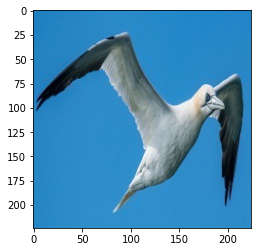

In [9]:
from PIL import Image
img= np.array(Image.open(data_dir+'/train'+'/NORTHERN GANNET/023.jpg'))
plt.imshow(img)

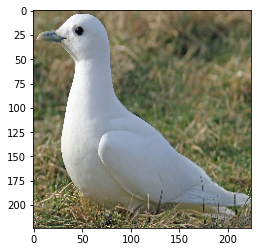

In [10]:
from PIL import Image
img= np.array(Image.open(data_dir+'/train'+'/IVORY GULL/076.jpg'))
plt.imshow(img)

In [11]:
for cls in classes:
  train_images=os.listdir(data_dir+ '/train/'+cls)
  print("Number of training examples in {} : {}".format(cls,len(train_images))) 

Number of training examples in CHARA DE COLLAR : 153
Number of training examples in WILSONS BIRD OF PARADISE : 155
Number of training examples in DOWNY WOODPECKER : 157
Number of training examples in CRESTED COUA : 153
Number of training examples in ALTAMIRA YELLOWTHROAT : 150
Number of training examples in ASIAN DOLLARD BIRD : 141
Number of training examples in ANNAS HUMMINGBIRD : 139
Number of training examples in HOUSE SPARROW : 155
Number of training examples in CAPE LONGCLAW : 133
Number of training examples in CINNAMON FLYCATCHER : 163
Number of training examples in TAILORBIRD : 141
Number of training examples in CHINESE POND HERON : 144
Number of training examples in BLACK-CAPPED CHICKADEE : 133
Number of training examples in WATTLED CURASSOW : 138
Number of training examples in CASPIAN TERN : 213
Number of training examples in RAZORBILL : 194
Number of training examples in NORTHERN FLICKER : 139
Number of training examples in DAURIAN REDSTART : 146
Number of training examples i

PyTorch expects the data to be in tensors, so I'm converting the images in tensors. We are also normalizing the images. And to also generalize the images for better performance we add a padding of 4px(from all sides) and fill the padding with the reflection of the background near the padding. We take a random crop of 50% prob ( 32px X 32px). We also need to shuffle the training images for better generalization.

Shuffling is not needed in case of validation or test phase

In [12]:
stats=((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
# Stats trained from pretrained ImageNet model
train_tfms=tt.Compose([
    tt.RandomHorizontalFlip(),
    tt.Resize((32,32)),
    tt.RandomCrop(32, padding=4, padding_mode='reflect'),
    tt.ToTensor(),
    tt.Normalize(*stats,inplace=True)])
valid_tfms=tt.Compose([
    tt.Resize((32,32)),
    tt.ToTensor(),
    tt.Normalize(*stats,inplace=True)]
)
test_tfms=tt.Compose([
    tt.Resize((32,32)),
    tt.ToTensor(),
    tt.Normalize(*stats,inplace=True)]
)

In [13]:
train_ds=ImageFolder(data_dir+'/train',train_tfms)
valid_ds=ImageFolder(data_dir+'/valid',valid_tfms)
test_ds=ImageFolder(data_dir+'/valid',test_tfms)

In [14]:
train_ds

Dataset ImageFolder
    Number of datapoints: 70626
    Root location: ./100-bird-species/train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
               RandomCrop(size=(32, 32), padding=4)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )

In [15]:
batch_size=128
train_dl=DataLoader(train_ds,batch_size,shuffle=True,num_workers=3,pin_memory=True)
valid_dl=DataLoader(valid_ds,batch_size*2,num_workers=3,pin_memory=True)
test_dl=DataLoader(valid_ds,batch_size*2,num_workers=3,pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [16]:
def denormalize(image,means,stds):
  means=torch.tensor(means).reshape(1,3,1,1)
  stds=torch.tensor(stds).reshape(1,3,1,1)
  image=image*stds+means
  return image
def show_batch(dl):
  for images,labels in dl:
    fig,ax=plt.subplots(figsize=(12,12))
    ax.set_xticks([]); ax.set_yticks([])
    denorm_images=denormalize(images,*stats)
    ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
    break

Let's have a look at the sample dataloader for the first batch of train samples only

### **The images appear distored due to the fact that they have been normalized and also they have been resized from 212 px to 32 px**

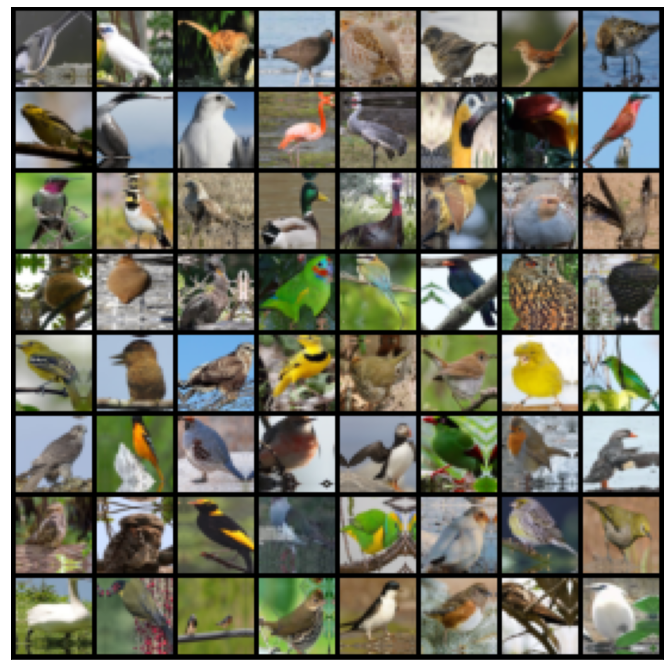

In [17]:
show_batch(train_dl)

To seamlessly use a GPU, if one is available, I define a couple of helper functions (`get_default_device` & `to_device`) besides a helper class `DeviceDataLoader` to move my model & data to the GPU as required. 

In [18]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [19]:
device=get_default_device()
device

device(type='cuda')

I wrap my training and validation data loaders using `DeviceDataLoader` for automatically transferring batches of data to the GPU (if available).

In [20]:
train_dl=DeviceDataLoader(train_dl,device)
valid_dl=DeviceDataLoader(valid_dl,device)

# **Model Architecture**

# **1. Using CNN**

In [28]:
def accuracy(outputs,labels):
  _, preds=torch.max(torch.softmax(outputs,dim=1),dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}],train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch,result['train_loss'], result['val_loss'], result['val_acc']))

In [29]:
def conv_block(in_channel,out_channel,pool=False):
  layers=[
      nn.Conv2d(in_channel,out_channel,kernel_size=3,padding=1),
      nn.BatchNorm2d(out_channel),
      nn.ReLU(inplace=True)
      ]
  if pool == True:
    layers.append(nn.MaxPool2d(2))
  return nn.Sequential(*layers)

class Cnn(ImageClassificationBase):
  def __init__(self,in_channels,num_classes):
    super().__init__()
    # 3 x 32 x 32
    self.conv1=conv_block(in_channels,64)
    # 64 x 32 x 32
    self.conv2=conv_block(64,64,True)
    # 64 x 16 x 16
    self.conv3=conv_block(64,128)
    # 128 x 16 x 16
    self.conv4=conv_block(128,128,True)
    # 128 x 8 x 8
    self.conv5=conv_block(128,256)
    # 256 x 8 x 8
    self.conv6=conv_block(256,256,True)
    # 256 x 4 x 4
    self.conv7=conv_block(256,512)
    # 512 x 4 x 4
    self.fc=nn.Sequential(
        nn.MaxPool2d(4),
        # 512 x 1 x 1
        nn.Flatten(),
        nn.Dropout(0.2),
        nn.Linear(512,num_classes)
    )
  def forward(self,xb):
    out=self.conv1(xb)
    out=self.conv2(out)
    out=self.conv3(out)
    out=self.conv4(out)
    out=self.conv5(out)
    out=self.conv6(out)
    out=self.conv7(out)
    out=self.fc(out)
    return out

# **Training the CNN Model** 

In [30]:
@torch.no_grad()
def evaluate(model,val_loader):
  model.eval()
  outputs=[model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs,lr,model,train_loader,val_loader,opt_func=torch.optim.SGD):
  torch.cuda.empty_cache()
  history=[]

  optimizer=opt_func(model.parameters(),lr)
  for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
        
  return history

In [31]:
model1=to_device(Cnn(3,450),device)
model1

Cnn(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv4): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, s

In [32]:
history1=[evaluate(model1,valid_dl)]
history1

[{'val_loss': 6.109625339508057, 'val_acc': 0.002170138992369175}]

In [33]:
epochs=10
lr=0.01
opt_func=torch.optim.Adam

In [34]:
history1+=fit(epochs,lr,model1,train_dl,valid_dl,opt_func)

Epoch [0],train_loss: 6.0857, val_loss: 5.3360, val_acc: 0.0249
Epoch [1],train_loss: 4.7525, val_loss: 3.5825, val_acc: 0.2118
Epoch [2],train_loss: 3.6931, val_loss: 2.7601, val_acc: 0.3748
Epoch [3],train_loss: 3.0502, val_loss: 2.1058, val_acc: 0.5027
Epoch [4],train_loss: 2.6248, val_loss: 1.7245, val_acc: 0.5752
Epoch [5],train_loss: 2.3338, val_loss: 1.5217, val_acc: 0.6227
Epoch [6],train_loss: 2.1104, val_loss: 1.2924, val_acc: 0.6645
Epoch [7],train_loss: 1.9411, val_loss: 1.1378, val_acc: 0.7189
Epoch [8],train_loss: 1.8041, val_loss: 1.0731, val_acc: 0.7228
Epoch [9],train_loss: 1.7040, val_loss: 1.0300, val_acc: 0.7346


In [35]:
history1+=fit(epochs,lr,model1,train_dl,valid_dl,opt_func)

Epoch [0],train_loss: 1.6233, val_loss: 0.9310, val_acc: 0.7508
Epoch [1],train_loss: 1.5270, val_loss: 0.9426, val_acc: 0.7591
Epoch [2],train_loss: 1.4547, val_loss: 0.8607, val_acc: 0.7780
Epoch [3],train_loss: 1.3881, val_loss: 0.7632, val_acc: 0.7956
Epoch [4],train_loss: 1.3329, val_loss: 0.7519, val_acc: 0.8037
Epoch [5],train_loss: 1.2832, val_loss: 0.7557, val_acc: 0.7953
Epoch [6],train_loss: 1.2444, val_loss: 0.6847, val_acc: 0.8227
Epoch [7],train_loss: 1.1918, val_loss: 0.7225, val_acc: 0.8094
Epoch [8],train_loss: 1.1615, val_loss: 0.7177, val_acc: 0.8106
Epoch [9],train_loss: 1.1276, val_loss: 0.6954, val_acc: 0.8248


## **Trend in accuracy and Loss**

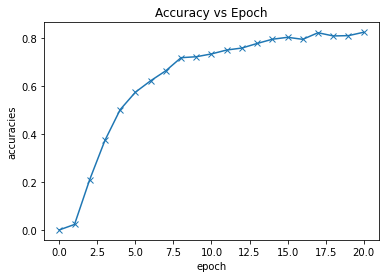

In [36]:
def plot_accuracies(history):
  accuracies=[x['val_acc'] for x in history]
  plt.plot(accuracies,'-x')
  plt.xlabel('epoch')
  plt.ylabel('accuracies')
  plt.title('Accuracy vs Epoch')

plot_accuracies(history1)

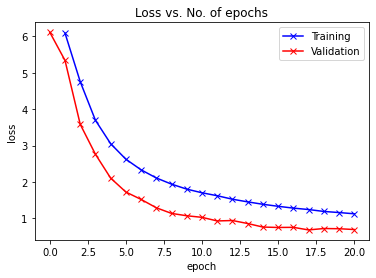

In [37]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');
    
plot_losses(history1)

In [38]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(torch.softmax(yb,dim=1),dim=1)
    return train_ds.classes[preds[0].item()]

Label: ALBATROSS , Predicted: ABBOTTS BOOBY


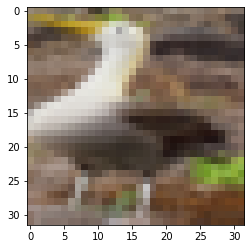

In [39]:
img, label = test_ds[40]
denorm_img=denormalize(img,*stats)
denorm_img=denorm_img.squeeze(0)
plt.imshow(denorm_img.permute(1, 2, 0).clamp(0, 1))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model1))

Label: GUINEAFOWL , Predicted: GUINEAFOWL


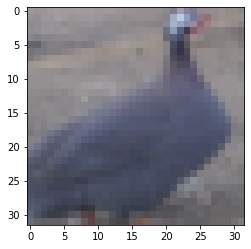

In [40]:
img, label = test_ds[1218]
denorm_img=denormalize(img,*stats)
denorm_img=denorm_img.squeeze(0)
plt.imshow(denorm_img.permute(1, 2, 0).clamp(0, 1))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model1))

In [41]:
test_dl=DeviceDataLoader(test_dl,device)

In [42]:
evaluate(model1,test_dl)

{'val_loss': 0.6953595280647278, 'val_acc': 0.8247601985931396}

Our Model achieves 82.4% accuracy on the test dataset which is fairly good. We'll see if we can further improve this by using ResNets

In [60]:
!pip install jovian --quiet

In [62]:
import jovian

In [64]:
jovian.reset()
jovian.log_hyperparams(arch='Cnn',
                       batch_size = batch_size,
                       epochs=epochs, 
                       lr=lr,
                       opt=opt_func.__name__)
jovian.log_metrics(val_loss=history1[-1]['val_loss'], 
                   val_acc=history1[-1]['val_acc'],
                   train_loss=history1[-1]['train_loss'])

[jovian] Hyperparams logged.
[jovian] Metrics logged.


# **2. Using ResNets**

### ResNets are a useful addition to Conventional Convolutional Neural Networks(CNN) which adds the original input back to the output feature map obtained by passing the input through one or more convolutional layers. This solves many problems encountered like vanishing gradient problems etc.
![](https://miro.medium.com/max/1140/1*D0F3UitQ2l5Q0Ak-tjEdJg.png) 

The Model that we are going to use is the ResNet9. 

![resnet-9](https://github.com/lambdal/cifar10-fast/raw/master/net.svg?sanitize=true)

In Addition to the Residual Blocks , we use Batch Normalization.
Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

In [43]:
class ResNet9(ImageClassificationBase):
  def __init__(self , in_channels, num_classes):
    super().__init__()
    # 3 x 32 x 32
    self.conv1= conv_block(in_channels,64)
    # 64 x 32 x 32
    self.conv2= conv_block(64,128,pool=True)
    # 128 x 16 x 16
    self.res1= nn.Sequential(conv_block(128,128),conv_block(128,128))
    # 128 x 16 x 16
    self.conv3 = conv_block(128, 256, pool=True)
    # 256 x 8 x 8
    self.conv4 = conv_block(256, 512, pool=True)
    # 512 x 4 x 4
    self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
    # 512 x 4 x 4
    self.fc = nn.Sequential(nn.MaxPool2d(4), # 512 x 1 x 1
                                    nn.Flatten(),
                                    nn.Dropout(0.2),
                                    nn.Linear(512,num_classes))
  def forward(self,xb):
    out=self.conv1(xb)
    out=self.conv2( out)
    out=self.res1(out)+out
    out=self.conv3(out)
    out=self.conv4(out)
    out=self.res2(out)+out
    out=self.fc(out)
    return out

In [44]:
model=to_device(ResNet9(3,450),device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

## Training the ResNet9 model

In [45]:
@torch.no_grad()
def evaluate(model,val_loader):
  model.eval()
  outputs=[model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def get_lr(optimizer):
  for param_group in optimizer.param_groups:
    return param_group['lr']

def fit_one_cycle(epochs,max_lr,model,train_loader,val_loader, weight_decay=0,grad_clip=None,opt_func=torch.optim.SGD):
  torch.cuda.empty_cache()
  history=[]

  optimizer=opt_func(model.parameters(),max_lr,weight_decay=weight_decay)
  sched= torch.optim.lr_scheduler.OneCycleLR(optimizer,max_lr,epochs=epochs,steps_per_epoch=len(train_loader))
  for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(),grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)

  return history

Let's estimate our models performace on the validation set

In [46]:
history=[evaluate(model,valid_dl)]
history

[{'val_loss': 6.110991477966309, 'val_acc': 0.0016501650679856539}]

We can see that our model gets an acucracy of 3.2% on the validation set. This is because the weights have been randomly initialized

In [47]:
epochs=15
max_lr=0.01
grad_clip=0.1
weight_decay=1e-4
opt_func=torch.optim.Adam

In [48]:
history+=fit_one_cycle(epochs,max_lr,model,train_dl,valid_dl,weight_decay,grad_clip,opt_func)

Epoch [0],train_loss: 5.2203, val_loss: 3.8984, val_acc: 0.1895
Epoch [1],train_loss: 3.4909, val_loss: 2.5966, val_acc: 0.4101
Epoch [2],train_loss: 2.4574, val_loss: 1.8537, val_acc: 0.5599
Epoch [3],train_loss: 2.0203, val_loss: 1.5619, val_acc: 0.6269
Epoch [4],train_loss: 1.8209, val_loss: 1.2575, val_acc: 0.6970
Epoch [5],train_loss: 1.6918, val_loss: 1.2163, val_acc: 0.6798
Epoch [6],train_loss: 1.5870, val_loss: 1.1078, val_acc: 0.7434
Epoch [7],train_loss: 1.4743, val_loss: 0.9835, val_acc: 0.7480
Epoch [8],train_loss: 1.3355, val_loss: 0.7834, val_acc: 0.7963
Epoch [9],train_loss: 1.1796, val_loss: 0.6403, val_acc: 0.8337
Epoch [10],train_loss: 0.9996, val_loss: 0.5711, val_acc: 0.8456
Epoch [11],train_loss: 0.8165, val_loss: 0.4721, val_acc: 0.8707
Epoch [12],train_loss: 0.6340, val_loss: 0.3665, val_acc: 0.9011
Epoch [13],train_loss: 0.4904, val_loss: 0.3341, val_acc: 0.9058
Epoch [14],train_loss: 0.4206, val_loss: 0.3218, val_acc: 0.9091


# **Let's Observe the trend in accuracy and loss**

In [49]:
def plot_accuracies(history):
  accuracies=[x['val_acc'] for x in history]
  plt.plot(accuracies,'-x')
  plt.xlabel('epoch')
  plt.ylabel('accuracies')
  plt.title('Accuracy vs Epoch')

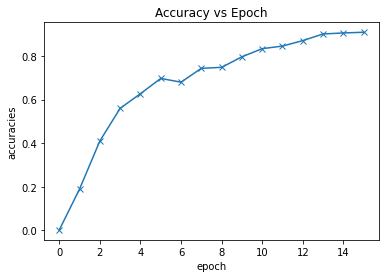

In [50]:
plot_accuracies(history)

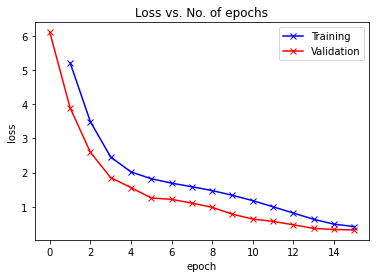

In [51]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');
    
plot_losses(history)

The graph almost flattens out on the test and validation errors, which indicates that there won't be any significant changes in model's loss even if we train for some more time. To Further reduce the loss and improve accuracy we have to perform fine tuning of hyperparameters

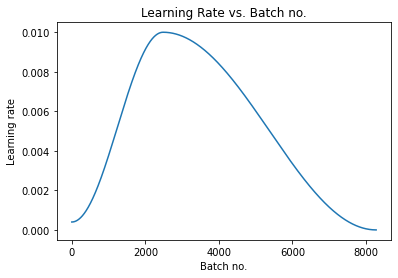

In [52]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

plot_lrs(history)

As anticipated, the `One Cycle Learning Rate Scheduler` starts at a low value, and gradually increases for 30% of the iterations to a defined maximum value of 0.01, followed by gradually decreasing to a very small value.

# **Testing with Individual Dataset**

In [53]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(torch.softmax(yb,dim=1),dim=1)
    return train_ds.classes[preds[0].item()]

Label: ALBATROSS , Predicted: ABBOTTS BOOBY


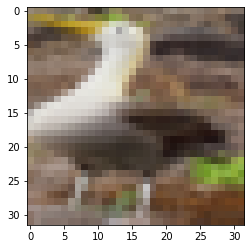

In [54]:
# Image Test#1 (With Clamping)
img, label = test_ds[40]
denorm_img=denormalize(img,*stats)
denorm_img=denorm_img.squeeze(0)
plt.imshow(denorm_img.permute(1, 2, 0).clamp(0, 1))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: SNOWY OWL , Predicted: SNOWY OWL


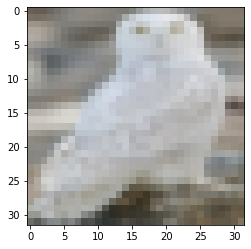

In [55]:
# Image Test#1 (With Clamping)
img, label = test_ds[1970]
denorm_img=denormalize(img,*stats)
denorm_img=denorm_img.squeeze(0)
plt.imshow(denorm_img.permute(1, 2, 0).clamp(0, 1))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: HARPY EAGLE , Predicted: HARPY EAGLE


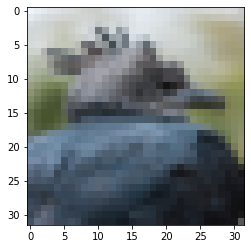

In [56]:
# Image Test#1 (With Clamping)
img, label = test_ds[1247]
denorm_img=denormalize(img,*stats)
denorm_img=denorm_img.squeeze(0)
plt.imshow(denorm_img.permute(1, 2, 0).clamp(0, 1))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

**As we can notice the model predicts correctly on individual inputs almost everytime and sometimes it may be even difficult for us humans to predict some birds.** 

**Manually looking for a input where the model fails is a very important case study to further improve our model** 

**We should devise a way/function to get those inputs where the model fails (but maybe later)**

In [57]:
evaluate(model,test_dl)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


{'val_loss': 0.3218308985233307, 'val_acc': 0.9090518951416016}

Now our model achieves an accuracy of 91% on the test set. We can maybe can cross this threshold by training for more epochs or increasing the batch_size or tuning the hyperparameters 

# **References** 

Here's a summary of the different techniques used in this Deep Learning to improve the model architecture performance and reduce the training time:

+ **Data normalization:** I normalized the image tensors by subtracting the mean and dividing by the standard deviation of pixels across each channel. Normalizing the data prevents the pixel values from any one channel from disproportionately affecting the losses and gradients. 

Reference: https://medium.com/@ml_kid/what-is-transform-and-transform-normalize-lesson-4-neural-networks-in-pytorch-ca97842336bd

+ **Data Augmentation:** I applied random transformations while loading images from the training dataset. Specifically, I padded each image by 4 pixels, and then take a random crop of size 32 x 32 pixels, and then flip the image horizontally with a 50% probability. 

Reference: https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/

+ **Residual Connections:** One of the key area of improvements to my ResNet9 model was the addition of the resudial block, which adds the original input back to the output feature map obtained by passing the input through one or more convolutional layers. I utilized the ResNet9 architecture to that aim.

Reference: https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec

+ **Batch Normalization:** After each convolutional layer, I added a Batch Normalization layer, which normalizes the outputs of the previous layer. This is somewhat similar to Data Normalization, except it is applied to the outputs of a layer, and the mean and standard deviation are learned parameters. 

Reference: https://towardsdatascience.com/batch-normalization-and-dropout-in-neural-networks-explained-with-pytorch-47d7a8459bcd

+ **Learning Rate Scheduling:** Instead of using a fixed learning rate, I used a Learning Rate Scheduler, which will change the learning rate after every batch of training. There are [many strategies](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate) for varying the learning rate during training, and I used the "`One Cycle Learning Rate Policy`". 

Reference: https://sgugger.github.io/the-1cycle-policy.html

+ **Weight Decay:** I added Weight Decay to the optimizer, yet another regularization technique which prevents the weights from becoming too large by adding an additional term to the loss function. 

Reference: https://towardsdatascience.com/this-thing-called-weight-decay-a7cd4bcfccab

+ **Gradient Clipping:** Moreover, I added Gradient Clipping capability, which helps limit the values of gradients to a small range to prevent undesirable changes in model parameters owing to large gradient values during training. 

Reference: https://towardsdatascience.com/what-is-gradient-clipping-b8e815cdfb48#63e0

+ **Adam Optimizer:** Instead of SGD (Stochastic Gradient Descent), I made use of the `Adam optimizer` which leverages techniques such as momentum and adaptive learning rates for faster training.

Reference: https://ruder.io/optimizing-gradient-descent/index.html


In [65]:
jovian.reset()
jovian.log_hyperparams(arch='ResNet9',
                       batch_size = batch_size,
                       epochs=epochs, 
                       lr=max_lr, 
                       scheduler='One Cycle Learning Rate Scheduler', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)
jovian.log_metrics(val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'],
                   train_loss=history[-1]['train_loss'])

[jovian] Hyperparams logged.
[jovian] Metrics logged.


In [67]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
